In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

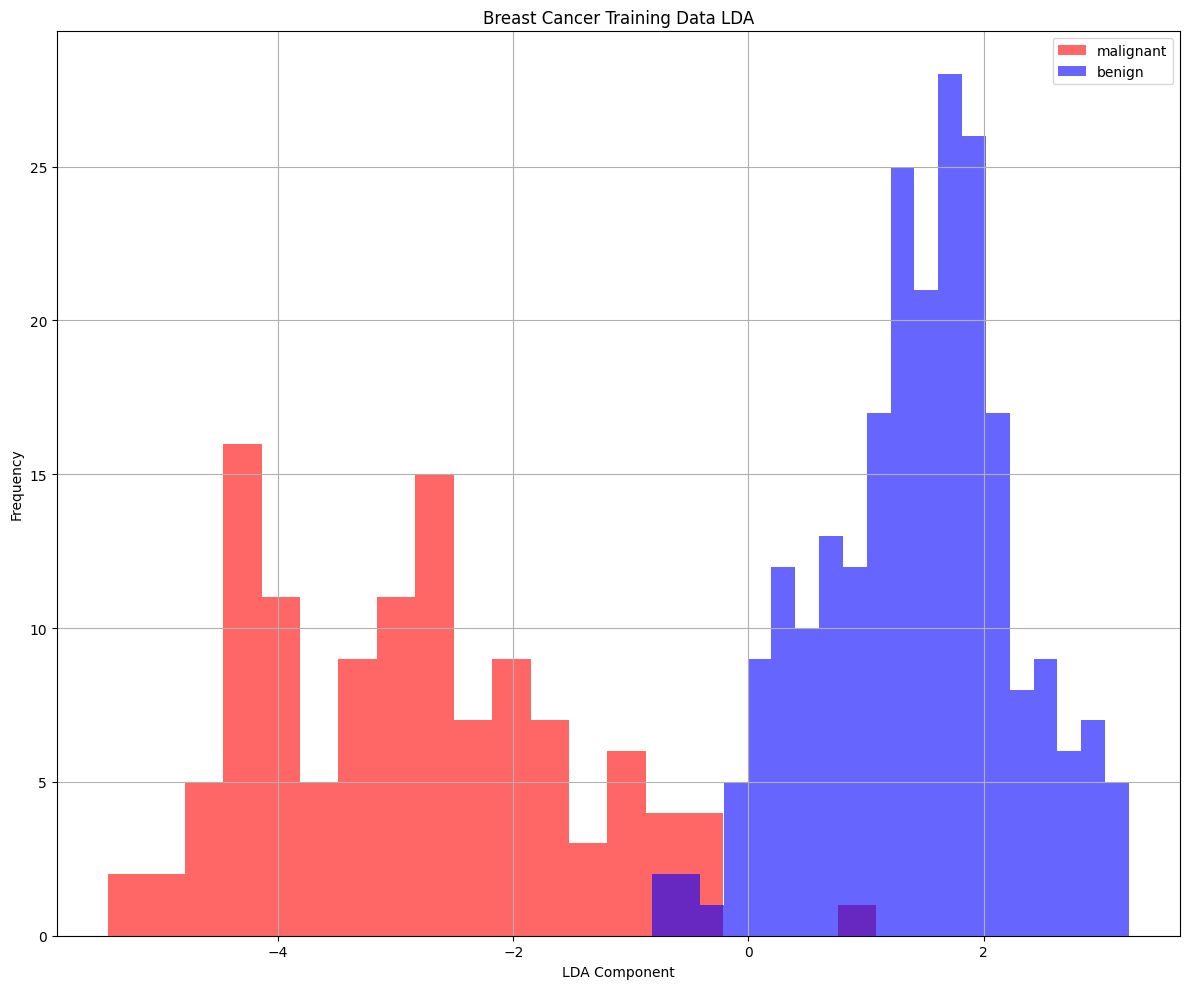

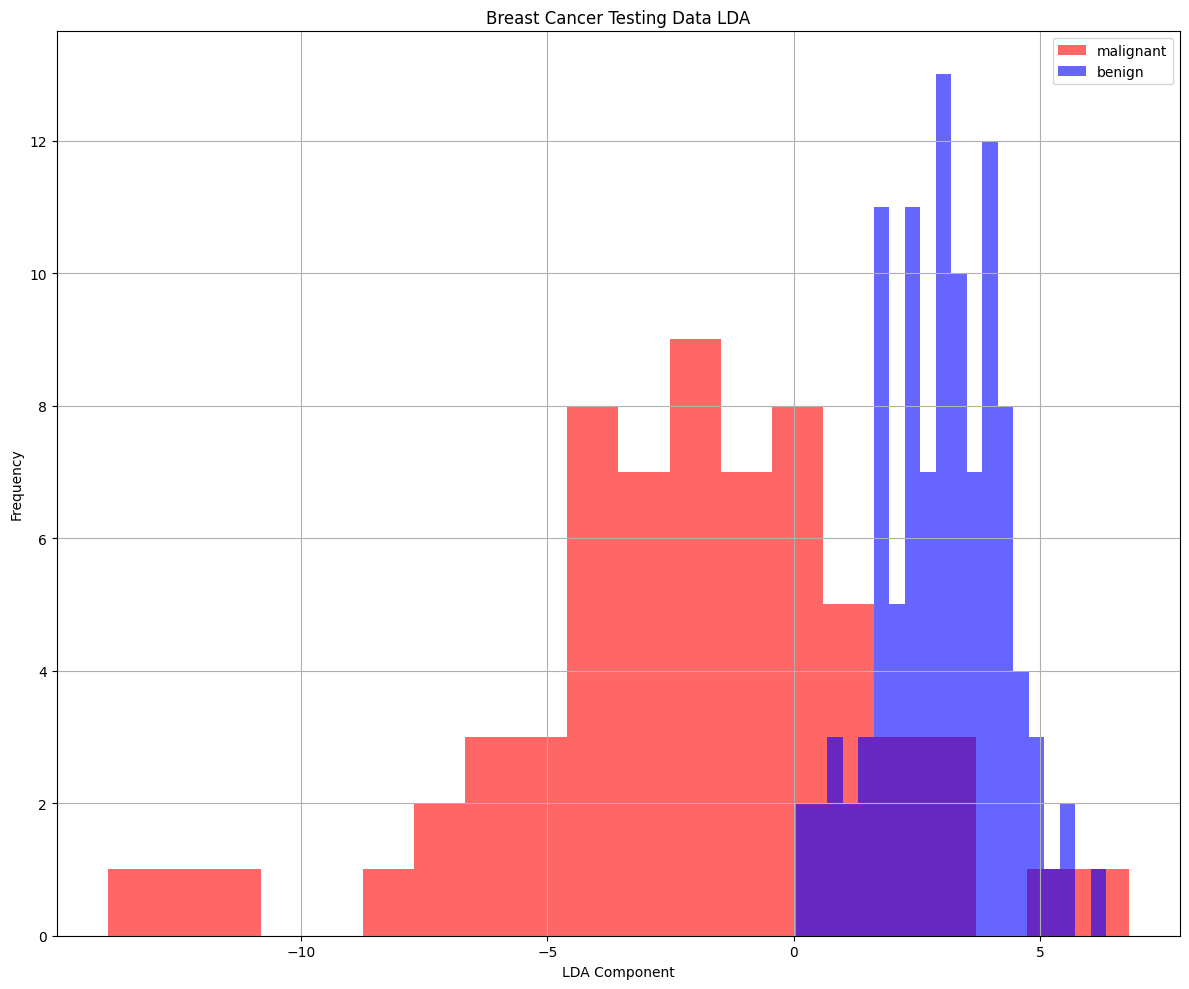

[I 2025-04-27 11:16:05,416] A new study created in memory with name: no-name-3c1e5fa8-7024-4522-b6ef-144c7d773a8d
[I 2025-04-27 11:16:05,443] Trial 0 finished with value: 0.9517505030181086 and parameters: {'C': 0.30169027773867374, 'kernel': 'rbf', 'gamma': 0.002583032977353946, 'max_iter': 2811}. Best is trial 0 with value: 0.9517505030181086.
[I 2025-04-27 11:16:05,473] Trial 1 finished with value: 0.9687323943661973 and parameters: {'C': 0.06326418512443967, 'kernel': 'rbf', 'gamma': 2.8039220726916554, 'max_iter': 6785}. Best is trial 1 with value: 0.9687323943661973.
[I 2025-04-27 11:16:05,499] Trial 2 finished with value: 0.667645875251509 and parameters: {'C': 0.14081530040750115, 'kernel': 'rbf', 'gamma': 0.0012891969128736305, 'max_iter': 6375}. Best is trial 1 with value: 0.9687323943661973.
[I 2025-04-27 11:16:05,511] Trial 3 finished with value: 0.9715895372233401 and parameters: {'C': 1.0494373120836449, 'kernel': 'sigmoid', 'gamma': 1.4086990088529545, 'max_iter': 9772}.

Best trial:
Accuracy: 0.9830181086519115
Best hyperparameters:  {'C': 0.02310749020017304, 'kernel': 'sigmoid', 'gamma': 0.723459714966104, 'max_iter': 4767}


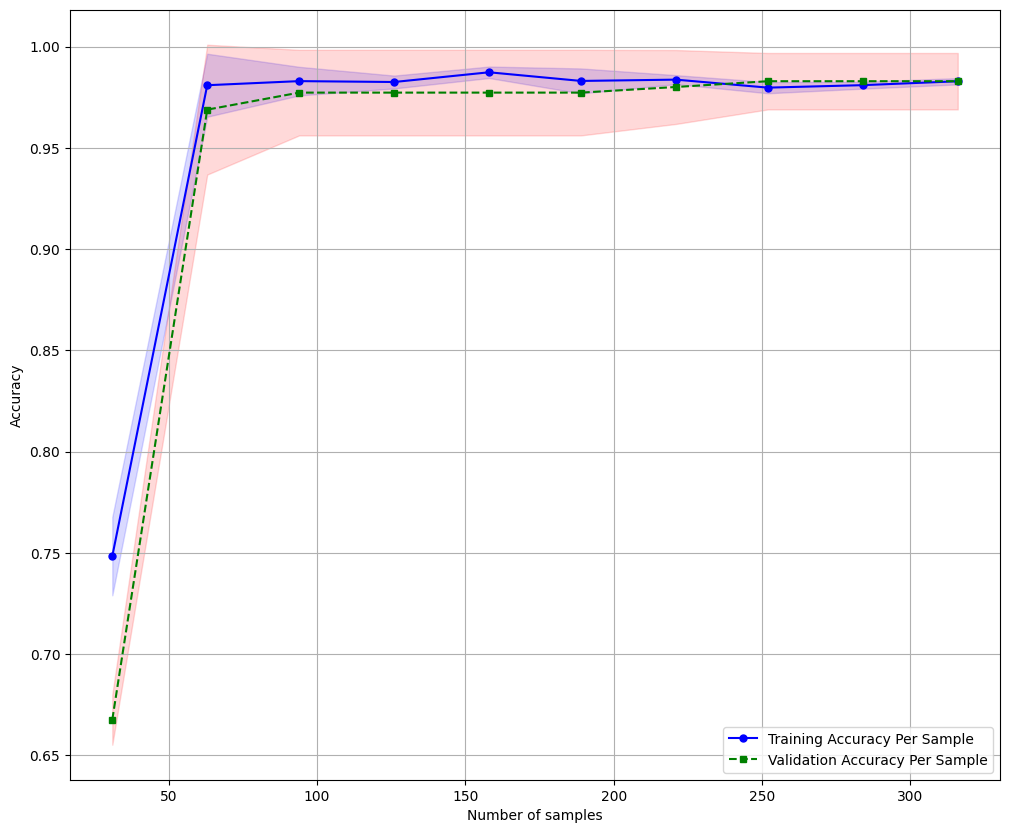

Confusion Matrix
[[ 47  17]
 [  0 107]]
Accuracy: 0.9006, Precision: 0.8629, Recall: 1.0000, F1: 0.9264, AUC: 0.9299


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)